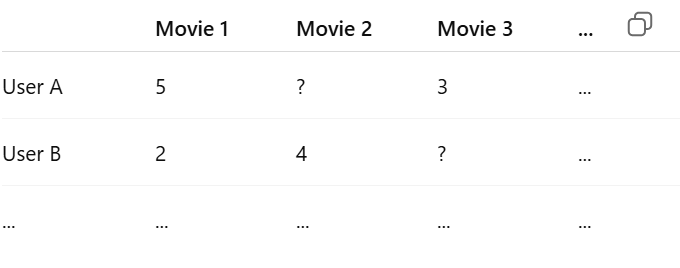

# SVD - Singular Value Decomposition

# SVD is a mathematical technique that helps us break down this large and sparse user-movie rating matrix into smaller , easier to understand parts. Its like compressing the into its core structure -- the hidden patterns.

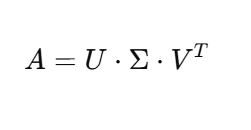

# A - Original user-movie matrix

# USER - FEARTURES MATRIX (USER PRREFERNCES)

# SUMMATION - DIAGONAL MATRIX WITH STRENGTHS OF FEATURES(IMPORTANCE)

#V^T - MOVIE FEATURES MATRIX(MOVIE CHARACTERISTIC)

# SVD - learns hidden factors from the known ratings

# how svd predict - Resconstruct the missing values using user/movie features

1. download the zip folder
2. extract the zip folder
3. upload the extracted folder in your drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drive mount

from google.colab import drive
drive.mount('/content/drive')  # colab connect to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#   Read the first data (Text file)

netflix_dataset = pd.read_csv('/content/drive/MyDrive/Netflix dataset-20250524T041836Z-1-001/Netflix dataset/Copy of combined_data_1.txt.zip',header = None,names = ['Cust_ID','Rating'], usecols = [0,1])

In [ ]:
netflix_dataset

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


# 8:18

In [ ]:
netflix_dataset.isnull().sum()
# where we have rating as null at that place in custid we have movie id

,0
Cust_ID,0
Rating,4499


In [ ]:
# get the count of the movies with the help of custid and rating column

movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count['Rating']
movie_count

4499

In [ ]:
# To calculate how many unique users are there

total_count = netflix_dataset['Cust_ID'].unique()

# how many unique values are there in the customer Id column

In [ ]:
total_count

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [ ]:
total_count = netflix_dataset['Cust_ID'].nunique()

In [ ]:
total_count

475257

In [ ]:
customer_count = total_count - movie_count

In [ ]:
customer_count

# The unique customer in the custid column excluding the movie_id

470758

In [ ]:
# 470758 these are the count of unique customers

In [ ]:
# To calculate how many ratings do we have that are given by user

rating_count = netflix_dataset['Cust_ID'].count() - movie_count
rating_count


# Total Number of rating from the rating column excluding the null values

24053764

In [ ]:
# To find out how many users have rated the movies as 1,2,3,4,5 stars to the movies

stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


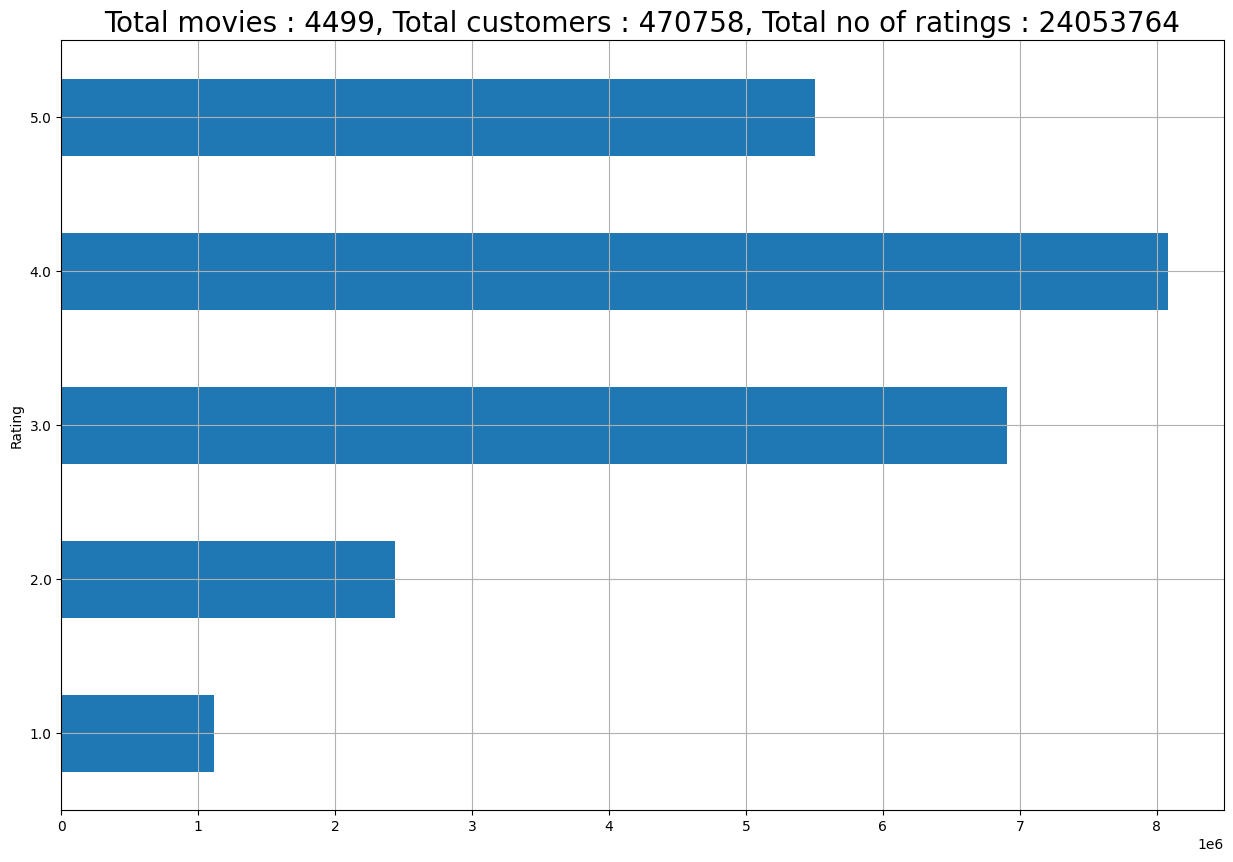

In [ ]:
ax =  stars.plot(kind = 'barh', legend = False , figsize = (15,10))
plt.title(f'Total movies : {movie_count}, Total customers : {customer_count}, Total no of ratings : {rating_count}', fontsize = 20)
plt.grid(True)
plt.show()

In [ ]:
# Let's just make a claer dataframe to find how many movie ids are there

movie_id = None
movie_np = []  # Empty list to store the movie id

# Iterate over the dataframe rows

for i in netflix_dataset['Cust_ID']:
  if ":" in i:
    # update the current movie ID in the column
    movie_id = int(i.replace(':','')) # Removed the : from the number
  movie_np.append(movie_id) # Adding the movie id number in the list


In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
netflix_dataset

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
# create a column in dataset to store movie id

netflix_dataset['Movie_ID'] = movie_np

In [ ]:
netflix_dataset

,Cust_ID,Rating,Movie_ID
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# It excludes the rows where the rating is Nan

In [ ]:
netflix_dataset

,Cust_ID,Rating,Movie_ID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset['Movie_ID'].count()

24053764

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   object 
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
# change the datatype of cust id from object to int

netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)

/tmp/ipython-input-34-993256242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   int64  
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


# Pre filtering Technique

To reduce the noise , improve model accuracy and optimize performance by removing sparse uninformative data before training the model


# Remove all the user that have rated less movies

* These users they don't provide enough data to understand their preferences

* The model can't reliably learn their taste or recommend meaningful content


# Remove the movies that were rated by very few users

* These movies they don't have enough data to understand what kind of people like them

* The model can't accurately position the movie in the latent(hidden) feature space

In [ ]:
#4499


# count the rating of the movie id

dataset_movie_summary = netflix_dataset.groupby('Movie_ID')['Rating'].agg(['count'])




In [ ]:
dataset_movie_summary

,count
Movie_ID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)


In [ ]:
movie_benchmark

908.0

* 60% of all the movies were rated 908 times or less

* The 60th perecentile is a value below which 60% of the data falls


* This percentile filtering keeps only the top 40% most-rated movies

In [ ]:
# If any movie is having rating less than 908 exclude that movie

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index


In [ ]:
# This list will store the index of all movie which are having rating less than 908
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_ID', length=2699)

In [ ]:
# how many movies we are going to remove

len(drop_movie_list)

2699

In [ ]:
# Remove the users that are inactive (who have rated less number of movies)

dataset_cust_summary = netflix_dataset.groupby('Cust_ID')['Rating'].agg(['count'])

In [ ]:

dataset_cust_summary

,count
Cust_ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

* 60% of users have rated 36 or fewer

* we will keeep only the top 40% of users who are more active those who have rated more movie that or equal to 36 movies


* movie_benchmark -> remove rarely rated movies

* cust_benchmark -> remove the inactive users

In [ ]:
# If any user have rated less than 36 movies please remove them

drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

In [ ]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_ID', length=282042)

In [ ]:
len(drop_cust_list) # how many users we are going to remove

282042

In [ ]:
# 1. Remove the movies that didn't meet the benchmark (less rated movies)

netflix_dataset = netflix_dataset[~netflix_dataset['Movie_ID'].isin(drop_movie_list)]

# we are keeping only those rows which are not in drop_movie_list

In [ ]:
# 2. Remove the customer that didn't meet the benchmark(inactive users)

netflix_dataset = netflix_dataset[~netflix_dataset['Cust_ID'].isin(drop_cust_list)]

# keeping only those rows which are not in drop_cust_list

In [ ]:
netflix_dataset # Final shape after removing the extra users and less rated movies

,Cust_ID,Rating,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# Model Building

In [ ]:
# Load the second dataset for movie names as with the previous dataset we only have movie id


df_title = pd.read_csv('/content/drive/MyDrive/Netflix dataset-20250524T041836Z-1-001/Netflix dataset/Copy of movie_titles.csv',encoding = 'ISO-8859-1',header = None,names = ['Movie_ID','Year','Name'], usecols = [0,1,2])


In [ ]:
df_title

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

* Reader - Defines how the rating scale should be interpreted

* Dataset - load the data into a format suitable for surprise


* Cross Validation -helps to evaluate how well your recommendation model (e.g , SVD) peerforms on unseen data by splitting the dataset into training and testing folds


In [ ]:
reader = Reader()

In [ ]:
# we will only work with the top 100k records for quick runtime

data = Dataset.load_from_df(netflix_dataset[['Cust_ID','Movie_ID','Rating']][:100000],reader)

# using Dataset.load_from_file() for loading the CSV

In [ ]:
data

In [ ]:
model = SVD()  # creating a SVD Model

In [ ]:
cross_validate(model,data,measures = ['RMSE'],cv = 3,verbose = True) # Training the model with the top 100k records

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0213  1.0173  1.0199  1.0195  0.0017  
Fit time          2.46    1.66    2.33    2.15    0.35    
Test time         0.47    0.69    0.68    0.61    0.10    


{'test_rmse': array([1.02132952, 1.01726791, 1.01987386]),
 'fit_time': (2.456113576889038, 1.6604981422424316, 2.3302555084228516),
 'test_time': (0.47309207916259766, 0.6855158805847168, 0.6828176975250244)}

# Recommendations

In [ ]:
# Filter tha data for finding a specific user 1331154 to whom we are going to suggest movie

user_rating = netflix_dataset[netflix_dataset['Cust_ID'] == 1331154]


In [ ]:
user_rating

,Cust_ID,Rating,Movie_ID
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
actual_df = user_rating['Rating']

In [ ]:
actual_df

,Rating
697,4.0
5178,4.0
31460,3.0
92840,4.0
224761,3.0
...,...
23439584,4.0
23546489,2.0
23649431,4.0
23844441,3.0


In [ ]:
# user 1331154 have rated 253 movies

In [ ]:
# Make a copy for each individual customer for Recommendation

user_1331154 = df_title.copy()
user_1331154

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Remove the less rated movies from the 2nd dataset also


user_1331154 = user_1331154[~user_1331154['Movie_ID'].isin(drop_movie_list)]

In [ ]:
user_1331154

,Movie_ID,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# predicting the rating for a specific user 1331154 across all movies

user_1331154['Estimated_Score'] = user_1331154['Movie_ID'].apply(lambda x : model.predict(1331154,x).est)

/tmp/ipython-input-68-3157409953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimated_Score'] = user_1331154['Movie_ID'].apply(lambda x : model.predict(1331154,x).est)


In [ ]:
user_1331154

,Movie_ID,Year,Name,Estimated_Score
2,3,1997.0,Character,3.849183
4,5,2004.0,The Rise and Fall of ECW,4.284946
5,6,1997.0,Sick,3.278728
7,8,2004.0,What the #$*! Do We Know!?,3.637168
15,16,1996.0,Screamers,3.215786
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.687245
17766,17767,2004.0,Fidel Castro: American Experience,3.687245
17767,17768,2000.0,Epoch,3.687245
17768,17769,2003.0,The Company,3.687245


* sometimes we predict all rating (including the known ones)

* see how well the model matches the real behaviour

* Comapre which movie the user really liked vs what the model thinks they will like

model.predict(user_id,movie_id).est
* The surprise library with the help of svd algorithm internally uses matrix factorization to estimate how much a user would rate a movie- even if they haven't rated it before

# It uses the trained SVD Model to predict the rating that the user 1331154 would give to that movie

# .est give the predicted score (estimated score)

In [ ]:
# Display the top 5 movies with the highest estimate score that the user 1331154 has given

top_rated_movies = user_1331154.sort_values("Estimated_Score",ascending = False)

In [ ]:
top_rated_movies

,Movie_ID,Year,Name,Estimated_Score
4,5,2004.0,The Rise and Fall of ECW,4.284946
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.058434
27,28,2002.0,Lilo and Stitch,3.912035
2,3,1997.0,Character,3.849183
29,30,2003.0,Something's Gotta Give,3.780198
...,...,...,...,...
5,6,1997.0,Sick,3.278728
16,17,2005.0,7 Seconds,3.244401
15,16,1996.0,Screamers,3.215786
23,24,1981.0,My Bloody Valentine,3.010540


In [ ]:
estimated_df = user_1331154['Estimated_Score']

In [ ]:
estimated_df

,Estimated_Score
2,3.849183
4,4.284946
5,3.278728
7,3.637168
15,3.215786
...,...
17765,3.687245
17766,3.687245
17767,3.687245
17768,3.687245


In [ ]:
actual_df

,Rating
697,4.0
5178,4.0
31460,3.0
92840,4.0
224761,3.0
...,...
23439584,4.0
23546489,2.0
23649431,4.0
23844441,3.0


In [ ]:
merged = pd.concat([actual_df,estimated_df],axis = 1)

In [ ]:
merged

,Rating,Estimated_Score
697,4.0,NaN
5178,4.0,3.687245
31460,3.0,NaN
92840,4.0,NaN
224761,3.0,NaN
...,...,...
17765,NaN,3.687245
17766,NaN,3.687245
17767,NaN,3.687245
17768,NaN,3.687245


In [ ]:
merged.head(10)

,Rating,Estimated_Score
697,4.0,NaN
5178,4.0,3.687245
31460,3.0,NaN
92840,4.0,NaN
224761,3.0,NaN
254460,3.0,NaN
359212,4.0,NaN
415976,3.0,NaN
458308,5.0,NaN
497905,3.0,NaN
